ETL from australian user reviews

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import string
import ast


Opening file and store it in DataFrame

In [3]:
# opening file and store it in a dataset
filename = "australian_user_reviews.json"
filepath = "./Datasets/"

# define a temporary list where each line of the file is going to be stored as an element
temp_list = []

with open(filepath + filename, encoding = "utf-8") as aust_user_rev_file:
    # iterate over each line inside the file
    for temp_row in aust_user_rev_file.readlines():
        # Evaluar la línea como una expresión de Python y agregarla a la lista
        temp_list.append(ast.literal_eval(temp_row))

# build a dataframe with the temporary list
aust_user_rev_df = pd.DataFrame(temp_list)


In [4]:
aust_user_rev_df

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."
...,...,...,...
25794,76561198306599751,http://steamcommunity.com/profiles/76561198306...,"[{'funny': '', 'posted': 'Posted May 31.', 'la..."
25795,Ghoustik,http://steamcommunity.com/id/Ghoustik,"[{'funny': '', 'posted': 'Posted June 17.', 'l..."
25796,76561198310819422,http://steamcommunity.com/profiles/76561198310...,"[{'funny': '1 person found this review funny',..."
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"[{'funny': '', 'posted': 'Posted July 21.', 'l..."


Dropping duplicated rows

In [5]:
# first lets find those rows that have duplicated values in all the columns (except 'reviews')
aust_user_rev_df[aust_user_rev_df.duplicated(list(aust_user_rev_df)[:2])]

,user_id,user_url,reviews
456,bokkkbokkk,http://steamcommunity.com/id/bokkkbokkk,"[{'funny': '', 'posted': 'Posted September 24,..."
1182,ImSeriouss,http://steamcommunity.com/id/ImSeriouss,"[{'funny': '', 'posted': 'Posted January 10, 2..."
1456,76561198062039159,http://steamcommunity.com/profiles/76561198062...,"[{'funny': '', 'posted': 'Posted August 24, 20..."
1477,76561198045009232,http://steamcommunity.com/profiles/76561198045...,"[{'funny': '', 'posted': 'Posted October 31, 2..."
1746,nitr0ticwolf,http://steamcommunity.com/id/nitr0ticwolf,"[{'funny': '', 'posted': 'Posted December 12, ..."
...,...,...,...
17819,76561198076474887,http://steamcommunity.com/profiles/76561198076...,"[{'funny': '', 'posted': 'Posted April 12.', '..."
17916,yolofaceguy,http://steamcommunity.com/id/yolofaceguy,"[{'funny': '', 'posted': 'Posted October 31, 2..."
18028,76561198075591109,http://steamcommunity.com/profiles/76561198075...,"[{'funny': '', 'posted': 'Posted December 26, ..."
18234,76561198092022514,http://steamcommunity.com/profiles/76561198092...,"[{'funny': '', 'posted': 'Posted July 3.', 'la..."


In [6]:
# secondly lets do the same but only looking for duplicated user_id
aust_user_rev_df[aust_user_rev_df.duplicated(list(aust_user_rev_df)[:1])]

,user_id,user_url,reviews
456,bokkkbokkk,http://steamcommunity.com/id/bokkkbokkk,"[{'funny': '', 'posted': 'Posted September 24,..."
1182,ImSeriouss,http://steamcommunity.com/id/ImSeriouss,"[{'funny': '', 'posted': 'Posted January 10, 2..."
1456,76561198062039159,http://steamcommunity.com/profiles/76561198062...,"[{'funny': '', 'posted': 'Posted August 24, 20..."
1477,76561198045009232,http://steamcommunity.com/profiles/76561198045...,"[{'funny': '', 'posted': 'Posted October 31, 2..."
1746,nitr0ticwolf,http://steamcommunity.com/id/nitr0ticwolf,"[{'funny': '', 'posted': 'Posted December 12, ..."
...,...,...,...
17819,76561198076474887,http://steamcommunity.com/profiles/76561198076...,"[{'funny': '', 'posted': 'Posted April 12.', '..."
17916,yolofaceguy,http://steamcommunity.com/id/yolofaceguy,"[{'funny': '', 'posted': 'Posted October 31, 2..."
18028,76561198075591109,http://steamcommunity.com/profiles/76561198075...,"[{'funny': '', 'posted': 'Posted December 26, ..."
18234,76561198092022514,http://steamcommunity.com/profiles/76561198092...,"[{'funny': '', 'posted': 'Posted July 3.', 'la..."


In [7]:
# by comparing them we can see that all rows with duplicated user_id are duplicated on all the columns, this means that there are no two records with the same user_id but different info
# (e.g. no new entry for an already existing user_id with updated reviews)
aust_user_rev_df[aust_user_rev_df.duplicated(list(aust_user_rev_df)[:2])].equals(aust_user_rev_df[aust_user_rev_df.duplicated(list(aust_user_rev_df)[:1])])

True

In [8]:
# lets drop duplicates by 'user_id' leaving the newest entry (in case of a future change in database could lead to the above mentioned situation, we keep the updated one)
aust_user_rev_df.drop_duplicates(subset = ['user_id'], keep = 'last', inplace = True)

users_number = aust_user_rev_df.shape[0]  # number of users

In [9]:
aust_user_rev_df

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."
...,...,...,...
25794,76561198306599751,http://steamcommunity.com/profiles/76561198306...,"[{'funny': '', 'posted': 'Posted May 31.', 'la..."
25795,Ghoustik,http://steamcommunity.com/id/Ghoustik,"[{'funny': '', 'posted': 'Posted June 17.', 'l..."
25796,76561198310819422,http://steamcommunity.com/profiles/76561198310...,"[{'funny': '1 person found this review funny',..."
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"[{'funny': '', 'posted': 'Posted July 21.', 'l..."


Work on 'reviews' column. From double nested one to different rows for each review posted by every user, and expand into columns the info of each review

Dealing with NaNs

In [10]:
# expand the nested review column in several rows, one for each reviewed game for each user
df1 = aust_user_rev_df.explode('reviews').reset_index()
# and drop all those rows without reviews
df1.dropna(inplace=True)

# by now we have the dataframe with the reviews column nested as a dictionary entry with 7 keys, lets expand it into 7 different columns
df2 = pd.concat([df1.drop(columns = 'reviews'), pd.DataFrame(df1['reviews'].tolist(), index=df1.index).add_prefix('reviews_')], axis=1)
df2
# df2 = df2.rename(columns={"reviewsfunny": "reviews_funny", "reviewsposted": "reviews_posted", "reviewslas_edited": "reviews_last_edited", "reviewsitem_id": "reviews_item_id", "reviewshelpful": "reviews_helpful", "reviewsrecommend": "reviews_recommend", "reviewsreview": "reviews_review"})

,index,user_id,user_url,reviews_funny,reviews_posted,reviews_last_edited,reviews_item_id,reviews_helpful,reviews_recommend,reviews_review
0,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.
2,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...
3,1,js41637,http://steamcommunity.com/id/js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
4,1,js41637,http://steamcommunity.com/id/js41637,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...
...,...,...,...,...,...,...,...,...,...,...
58453,25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,,Posted July 10.,,70,No ratings yet,True,a must have classic from steam definitely wort...
58454,25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,,Posted July 8.,,362890,No ratings yet,True,this game is a perfect remake of the original ...
58455,25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,1 person found this review funny,Posted July 3.,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...
58456,25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,,Posted July 20.,,730,No ratings yet,True,:D


In [11]:
# Where it can be seen that rows without year just month and day in 'review_posted',
# it could be assumed that those posts are on the current year when the snapshot of the database was taken

# lets first change "review_posted" to date format
df2['reviews_posted'] = df2.reviews_posted.str[7:].str[:-1]
df2 = pd.concat([df2, df2.reviews_posted.str.split(', ', expand=True)], axis = 1)
df2.drop('reviews_posted', axis=1, inplace=True)
df2 = df2.rename(columns={0: "reviews_month-day", 1: "reviews_year"})
df2

,index,user_id,user_url,reviews_funny,reviews_last_edited,reviews_item_id,reviews_helpful,reviews_recommend,reviews_review,reviews_month-day,reviews_year
0,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,November 5,2011
1,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,,22200,No ratings yet,True,It's unique and worth a playthrough.,July 15,2011
2,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,April 21,2011
3,1,js41637,http://steamcommunity.com/id/js41637,,,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,June 24,2014
4,1,js41637,http://steamcommunity.com/id/js41637,,,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,September 8,2013
...,...,...,...,...,...,...,...,...,...,...,...
58453,25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,,,70,No ratings yet,True,a must have classic from steam definitely wort...,July 10,None
58454,25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,,,362890,No ratings yet,True,this game is a perfect remake of the original ...,July 8,None
58455,25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,1 person found this review funny,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...,July 3,None
58456,25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,,,730,No ratings yet,True,:D,July 20,None


In [12]:
# lets see if there are any NaNs after transformation
df2.isna().sum()

index                     0
user_id                   0
user_url                  0
reviews_funny             0
reviews_last_edited       0
reviews_item_id           0
reviews_helpful           0
reviews_recommend         0
reviews_review            0
reviews_month-day         0
reviews_year           9933
dtype: int64

In [13]:
# All NaNs are in 'reviews_year' so in order to imput the missing years we need to know which year was the last one (the previous year to the snapshot)
posts_years = df2['reviews_year'].unique()
posts_years = list(map(int, filter(None, posts_years)))     # removing None value and converting it to list of integers
list(posts_years)

[2011, 2014, 2013, 2015, 2012, 2010]

In [14]:
posts_max_year = max(posts_years) + 1
posts_max_year

2016

In [15]:
# 2015 is the last year registered so the current snapshot must be taken in 2016. Lets impute NaNs with 2016
df2['reviews_year'] = df2['reviews_year'].fillna(str(posts_max_year))

In [16]:
# checking
df2['reviews_year'].unique()

array(['2011', '2014', '2013', '2016', '2015', '2012', '2010'],
      dtype=object)

In [17]:
# now lets convert 'reviews_year' column to integer
df2['reviews_year'].apply(int)

0        2011
1        2011
2        2011
3        2014
4        2013
         ... 
58453    2016
58454    2016
58455    2016
58456    2016
58457    2016
Name: reviews_year, Length: 58431, dtype: int64

Sentiment Analysis of review posts

In [18]:
reviews_posts = df2[['user_id', 'reviews_item_id', 'reviews_recommend', 'reviews_year', 'reviews_review']]
reviews_posts

,user_id,reviews_item_id,reviews_recommend,reviews_year,reviews_review
0,76561197970982479,1250,True,2011,Simple yet with great replayability. In my opi...
1,76561197970982479,22200,True,2011,It's unique and worth a playthrough.
2,76561197970982479,43110,True,2011,Great atmosphere. The gunplay can be a bit chu...
3,js41637,251610,True,2014,I know what you think when you see this title ...
4,js41637,227300,True,2013,For a simple (it's actually not all that simpl...
...,...,...,...,...,...
58453,76561198312638244,70,True,2016,a must have classic from steam definitely wort...
58454,76561198312638244,362890,True,2016,this game is a perfect remake of the original ...
58455,LydiaMorley,273110,True,2016,had so much fun plaing this and collecting res...
58456,LydiaMorley,730,True,2016,:D


In [19]:
import nltk
import re
from nltk.tokenize import word_tokenize

nltk.download(["names", "stopwords", "state_union", "twitter_samples", "movie_reviews", "averaged_perceptron_tagger", "vader_lexicon", "punkt", "wordnet"])
from nltk.stem import WordNetLemmatizer
stopwords = nltk.corpus.stopwords.words("english")
sia = SentimentIntensityAnalyzer()
# Create WordNetLemmatizer object
wnl = WordNetLemmatizer()

[nltk_data] Downloading package names to /home/federico/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/federico/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     /home/federico/nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /home/federico/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/federico/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/federico/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/federico/nlt

In [20]:
def sentiment_analysis(review: str):
    # take the review string
    temp_review = review
    # make it lower case
    temp_review = temp_review.lower()
    # remove punctuation marks
    temp_review = re.sub(r'[^\w\s]', '', temp_review)
    # tokenize it
    word_tokens = word_tokenize(temp_review)
    # remove stop words
    filtered_sentence = [w for w in word_tokens if not w.lower() in stopwords]
    # and lemmatize it
    lemmatized_string = ' '.join([wnl.lemmatize(words) for words in filtered_sentence])
    
    # calculate the sentiment score
    return sia.polarity_scores(lemmatized_string)['compound']


In [21]:
# applying sentiment_analysis function to reviews and store polarity_score(compound) in a new column
reviews_posts['sa_compound'] = reviews_posts["reviews_review"].apply(lambda x: sentiment_analysis(x))

/tmp/ipykernel_5020/2156113172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_posts['sa_compound'] = reviews_posts["reviews_review"].apply(lambda x: sentiment_analysis(x))


<AxesSubplot: xlabel='sa_compound', ylabel='Count'>

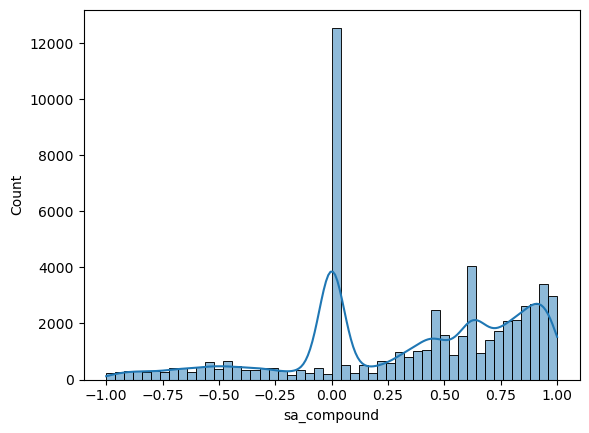

In [22]:
# lets see the distribution of scores obtained
sns.histplot(data = reviews_posts, x = 'sa_compound', kde = True)

# a quick exploration inside those rows that got "0" sa_compound leads that are from non-english written reviews, emoticons, and confussion from algorithm

In [23]:
# lets identify sa_scores with review sentiment like this: sa_score > 0.5 --> positive (1), sa_score < -0.25 --> negative (-1), in between --> neutral (0)
reviews_posts['review_sentiment'] = reviews_posts['sa_compound'].apply(lambda x: 1 if x > 0.5 else (-1 if x < -0.25 else 0))
reviews_posts

/tmp/ipykernel_5020/615592170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_posts['review_sentiment'] = reviews_posts['sa_compound'].apply(lambda x: 1 if x > 0.5 else (-1 if x < -0.25 else 0))


,user_id,reviews_item_id,reviews_recommend,reviews_year,reviews_review,sa_compound,review_sentiment
0,76561197970982479,1250,True,2011,Simple yet with great replayability. In my opi...,0.8481,1
1,76561197970982479,22200,True,2011,It's unique and worth a playthrough.,0.2263,0
2,76561197970982479,43110,True,2011,Great atmosphere. The gunplay can be a bit chu...,0.8910,1
3,js41637,251610,True,2014,I know what you think when you see this title ...,0.5532,1
4,js41637,227300,True,2013,For a simple (it's actually not all that simpl...,0.9550,1
...,...,...,...,...,...,...,...
58453,76561198312638244,70,True,2016,a must have classic from steam definitely wort...,0.5574,1
58454,76561198312638244,362890,True,2016,this game is a perfect remake of the original ...,0.9776,1
58455,LydiaMorley,273110,True,2016,had so much fun plaing this and collecting res...,0.3818,0
58456,LydiaMorley,730,True,2016,:D,0.0000,0


In [24]:
# checking that all rows without written review has 0 review_sentiment
condition = reviews_posts['reviews_review'] == ''
reviews_posts.loc[condition, :]

,user_id,reviews_item_id,reviews_recommend,reviews_year,reviews_review,sa_compound,review_sentiment
1240,Punixa,259080,True,2013,,0.0,0
2136,matt20131,440,True,2016,,0.0,0
2225,76561198094830975,730,True,2016,,0.0,0
2968,2ZESTY4ME,550,True,2016,,0.0,0
3028,mrpoo2,261980,False,2014,,0.0,0
...,...,...,...,...,...,...,...
55950,76561198094149935,238460,True,2014,,0.0,0
56021,420BlazeItMLG,253710,False,2016,,0.0,0
56772,76561198101250184,224260,True,2014,,0.0,0
58162,ButNae,113400,False,2015,,0.0,0


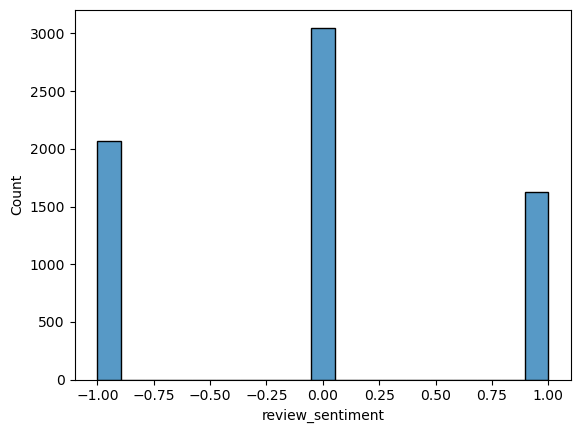

In [25]:
# now lets see what happened with those reviews that were specifically NOT recommended
condition = reviews_posts['reviews_recommend'] == False
sns.histplot(data = reviews_posts.loc[condition, :], x = 'review_sentiment')
plt.show()

In [153]:
# a fair amount of them are being identified as positive reviews by the algorithm... it doesn't seems right
# this is an issue that should be addressed.

# nevertheless, it seems like sentiment analysis in game's reviews in particular are pretty hard topic
# Viggiato, Markos et al. “What Causes Wrong Sentiment Classifications of Game Reviews?” IEEE Transactions on Games 14 (2022): 350-363.
# article where authors discuss the issue of how pretty good methods in other areas (like in movie reviews) can't cope with the gaming community particularities, like the tendency of using sarcasm when posting a review


,user_id,reviews_item_id,reviews_recommend,reviews_year,reviews_review,sa_compound,review_sentiment
47,76561198043472122,33440,False,2014,This Game Doesn't Work,0.0000,0
61,76561198066046412,359320,False,2015,"charged me 80 now its 15 dollars, got boring ...",-0.4767,-1
67,76561198070565427,570,False,2014,"w,",0.0000,0
83,boydeer,383080,False,2015,เกมเเดกเงินดีๆนี้เอง,0.0000,0
120,sandwiches1,417860,False,2015,Emily is a thot,0.0000,0
...,...,...,...,...,...,...,...
58415,kimjongadam,273110,False,2016,Well there is no other review I can give to th...,0.2732,0
58421,iwishihadaids,391460,False,2016,Bad,-0.5423,-1
58436,MeloncraftLP,265630,False,2016,DON'T INSTALL THIS GAME!!!!!!!!!!!!!!!!!!!!!!!...,0.7304,1
58437,76561198277602337,306130,False,2016,"Game is terrible! So, Iv tried 15hrs tryin to ...",-0.2263,0


In [26]:
# dropping review and review_year columns
reviews_posts = reviews_posts[['user_id', 'reviews_item_id', 'reviews_recommend', 'reviews_year', 'sa_compound', 'review_sentiment']]
reviews_posts['reviews_year'] = pd.to_numeric(reviews_posts['reviews_year'])

/tmp/ipykernel_5020/2745212847.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_posts['reviews_year'] = pd.to_numeric(reviews_posts['reviews_year'])


In [65]:
# exporting file
reviews_posts.to_csv(filepath + 'reviews_posts.csv', sep = "|", encoding = "utf-8")

In [28]:
game_info = pd.read_csv(filepath + "game_info.csv", sep = "|", encoding="utf-8")

In [52]:
temp_df['developer'].unique()

array(['Tripwire Interactive', 'ACE Team', nan, ...,
       'Capcom U.S.A., Inc.', 'SkyGoblin', 'Aeon Dream Studios'],
      dtype=object)

ETL process finished

Starting EDA

In [28]:
df2

,index,user_id,user_url,reviews_funny,reviews_last_edited,reviews_item_id,reviews_helpful,reviews_recommend,reviews_review,reviews_month-day,reviews_year
0,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,November 5,2011
1,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,,22200,No ratings yet,True,It's unique and worth a playthrough.,July 15,2011
2,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,April 21,2011
3,1,js41637,http://steamcommunity.com/id/js41637,,,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,June 24,2014
4,1,js41637,http://steamcommunity.com/id/js41637,,,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,September 8,2013
...,...,...,...,...,...,...,...,...,...,...,...
58453,25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,,,70,No ratings yet,True,a must have classic from steam definitely wort...,July 10,2016
58454,25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,,,362890,No ratings yet,True,this game is a perfect remake of the original ...,July 8,2016
58455,25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,1 person found this review funny,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...,July 3,2016
58456,25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,,,730,No ratings yet,True,:D,July 20,2016


In [29]:
# which is the proportion of reviews that recommend the corresponding game?
df2['reviews_recommend'].sum()/len(df2)

# really not quite useful to use reviews_recommend since 85% of the reviews are recommended, at least not at first

0.8846673854631959